In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import PIL
import os

In [2]:
torch.cuda.reset_peak_memory_stats()

In [3]:
torch.cuda.empty_cache()

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
num_classes = 2
learning_rate = 1e-3
batch_size = 64

In [6]:
overall_path = 'C:/Users/muham/Desktop/AI projects/Melanoma/melanoma_cancer_dataset'
file_overall = overall_path
classes = os.listdir(file_overall + '/train')
classes

['benign', 'malignant']

In [7]:
benign_files_train = os.listdir(file_overall + '/train/benign')
print('Number of Benign: ', len(benign_files_train))
print(benign_files_train[:5])

Number of Benign:  5000
['melanoma_0.jpg', 'melanoma_1.jpg', 'melanoma_10.jpg', 'melanoma_100.jpg', 'melanoma_1000.jpg']


In [8]:
malignant_train = os.listdir(file_overall + '/train/malignant')
print('Number of Malignant: ', len(malignant_train))
print(malignant_train[:5])

Number of Malignant:  4605
['melanoma_5000.jpg', 'melanoma_5001.jpg', 'melanoma_5002.jpg', 'melanoma_5003.jpg', 'melanoma_5004.jpg']


In [9]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [10]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [11]:
train_transforms = transforms.Compose([transforms.Resize((256, 256)),
                                       transforms.CenterCrop((224, 224)),
                                       transforms.ColorJitter(brightness=0.5),
                                       transforms.RandomGrayscale(p=0.2),
                                       transforms.RandomRotation(degrees=30, interpolation=PIL.Image.BILINEAR),
                                       transforms.ToTensor(),
                                       transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))])

valid_transforms = transforms.Compose([transforms.Resize((256, 256)),
                                       transforms.CenterCrop((224, 224)),
                                      transforms.ToTensor(),
                                     transforms.Normalize(torch.Tensor(mean), torch.Tensor(std))])

C:\Users\muham\AppData\Local\Temp\ipykernel_29100\1679968649.py:5: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  transforms.RandomRotation(degrees=30, interpolation=PIL.Image.BILINEAR),
C:\Users\muham\anaconda3\envs\myai\lib\site-packages\torchvision\transforms\transforms.py:1305: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


In [12]:
dataset = ImageFolder(file_overall+'/train', transform=train_transforms) # converts to tensors

In [13]:
len(dataset)

9605

In [14]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 224, 224]) 0


tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         ...,
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
         [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1

In [15]:
print(dataset.classes) # 0 is benign  and 1 is malignant

['benign', 'malignant']


In [16]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0)) # changes the structure of the img shape for matplot to be able to work with it

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  benign (0)


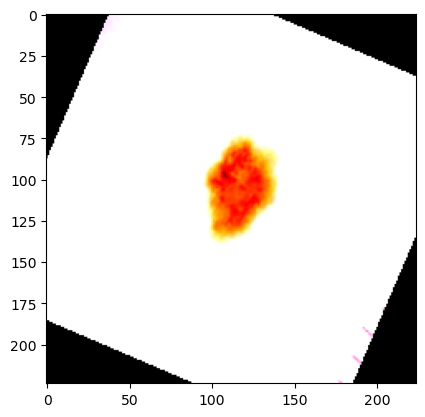

In [17]:
img, label = dataset[0]
show_example(img, label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  benign (0)


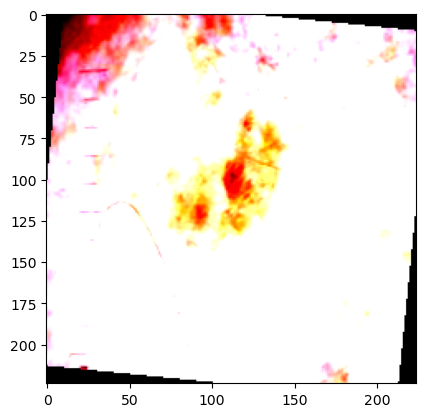

In [18]:
# or you can easily use this code, instead of breaking it up seperately as above
show_example(*dataset[1000])

In [19]:
from torch.utils.data import random_split

In [20]:
val_size = 1000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(8605, 1000)

In [21]:
train_dl = DataLoader(train_ds, 
                      batch_size, 
                      shuffle=True, 
                      pin_memory=True,
                      drop_last=True)

valid_dl = DataLoader(val_ds,
                      batch_size*2,
                      pin_memory=True,
                      drop_last=True)

In [24]:
model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b4', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

model.eval().to(device)

model

Using cache found in C:\Users\muham/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
C:\Users\muham/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub\PyTorch\Classification\ConvNets\image_classification\models\common.py:13: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
C:\Users\muham/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub\PyTorch\Classification\ConvNets\image_classification\models\efficientnet.py:17: UserWarning: pytorch_quantization module not found, quantization will not be available
  warnings.warn(
Using cache found in C:\Users\muham/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub


EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
          (bn): BatchNorm2d(48, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=48, out_features=12, bias=True)
          (expand): Linear(in_features=12, out_features=48, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
    

In [25]:
for param in model.parameters():
    param.requires_grad = False

In [26]:
model.classifier.dropout = nn.Dropout(p=0.4, inplace=False)
model.classifier.fc = nn.Linear(1792, num_classes, bias=True)

In [27]:
model = model.to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [28]:
# Train the Model:

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0]*num_epochs
    accuracy_hist_train = [0]*num_epochs
    loss_hist_valid = [0]*num_epochs
    accuracy_hist_valid = [0]*num_epochs
    
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device)
            pred = model(x_batch)
            y_batch = y_batch.to(device)
            loss = loss_func(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1)==y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().item()
        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
        model.eval()
        
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device)
                pred = model(x_batch)
                y_batch = y_batch.to(device)
                #y_batch = y_batch.to(torch.float32)
                loss = loss_func(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1)==y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().item()
            loss_hist_valid[epoch] /= len(valid_dl.dataset)
            accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
            
            print(f'Epoch {epoch+1} accuracy: '
                  f'{accuracy_hist_train[epoch]:.4f} val_accuracy: '
                  f'{accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

In [29]:
torch.manual_seed(123)
num_epochs=100
model_sum = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.8064 val_accuracy: 0.7270
Epoch 2 accuracy: 0.8354 val_accuracy: 0.7700
Epoch 3 accuracy: 0.8447 val_accuracy: 0.7800
Epoch 4 accuracy: 0.8451 val_accuracy: 0.7780
Epoch 5 accuracy: 0.8445 val_accuracy: 0.7760
Epoch 6 accuracy: 0.8472 val_accuracy: 0.7750
Epoch 7 accuracy: 0.8416 val_accuracy: 0.7670
Epoch 8 accuracy: 0.8525 val_accuracy: 0.7850
Epoch 9 accuracy: 0.8439 val_accuracy: 0.7730
Epoch 10 accuracy: 0.8530 val_accuracy: 0.7770
Epoch 11 accuracy: 0.8475 val_accuracy: 0.7790
Epoch 12 accuracy: 0.8469 val_accuracy: 0.7820
Epoch 13 accuracy: 0.8509 val_accuracy: 0.7780
Epoch 14 accuracy: 0.8494 val_accuracy: 0.7670
Epoch 15 accuracy: 0.8504 val_accuracy: 0.7650
Epoch 16 accuracy: 0.8452 val_accuracy: 0.7610
Epoch 17 accuracy: 0.8555 val_accuracy: 0.7590
Epoch 18 accuracy: 0.8449 val_accuracy: 0.7570
Epoch 19 accuracy: 0.8446 val_accuracy: 0.7650
Epoch 20 accuracy: 0.8507 val_accuracy: 0.7740
Epoch 21 accuracy: 0.8429 val_accuracy: 0.7790
Epoch 22 accuracy: 0.8

In [30]:
test_dataset = ImageFolder(file_overall+'/test', transform=ToTensor())

In [31]:
def predict_image(img, model):
    # convert the image into a batch of 1
    x_b = (img.unsqueeze(0)).to(device)
    y_b = model(x_b)
    _, preds = torch.max(y_b, dim=1)
    return dataset.classes[preds[0].item()]

Label:  benign , Predicted: benign


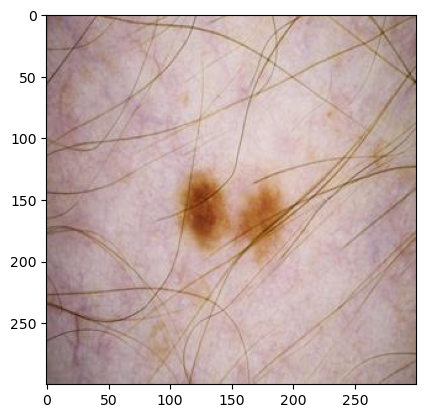

In [32]:
img, label = test_dataset[97]
plt.imshow(img.permute(1, 2, 0))
print('Label: ', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [33]:
len(test_dataset)

1000

In [34]:
test_loader = DataLoader(test_dataset,
                      batch_size*2,
                      pin_memory=True,
                      drop_last=True, shuffle=False)

In [35]:
# Test Accuracy
accuracy_test = 0
model.eval()
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        pred = model(x_batch)
        is_correct = (torch.argmax(pred, dim=1)==y_batch).float()
        accuracy_test += is_correct.sum()
accuracy_test /= len(test_loader.dataset)
print(f'Test Acc: {accuracy_test:.4f}')

Test Acc: 0.7890


In [36]:
path = 'skin_cancer_eff.pt'
torch.save(model, path)